	Train a Model with Different Optimizers

Task: Train MNIST Model with Adam & SGD

1.	Load the MNIST dataset.
2.	Train two models: One with Adam and another with SGD.
3.	Compare training and validation accuracy trends.

Expected Output:

•	Accuracy plots comparing Adam vs. SGD performance.

In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Define optimizers to compare
optimizers = ['adam', 'sgd']
histories = {}



In [7]:
for opt in optimizers:
    # Define a new model each time
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compile with the chosen optimizer
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\nTraining with optimizer: {opt}")
    history = model.fit(x_train, y_train,
                        epochs=5,
                        validation_data=(x_test, y_test),
                        verbose=1)
    
    # Save training history
    histories[opt] = history



c:\Users\johnw\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training with optimizer: adam
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8738 - loss: 0.4439 - val_accuracy: 0.9590 - val_loss: 0.1381
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9636 - loss: 0.1226 - val_accuracy: 0.9695 - val_loss: 0.1015
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.0772 - val_accuracy: 0.9708 - val_loss: 0.0930
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9824 - loss: 0.0593 - val_accuracy: 0.9781 - val_loss: 0.0726
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9875 - loss: 0.0414 - val_accuracy: 0.9740 - val_loss: 0.0824

Training with optimizer: sgd
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7318 - loss: 1.0476 - val_accuracy: 0.9018 - val_loss: 0.3609
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9025 - loss: 0.3532 - val_accuracy: 0.9154 - val_loss: 0.3010
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━

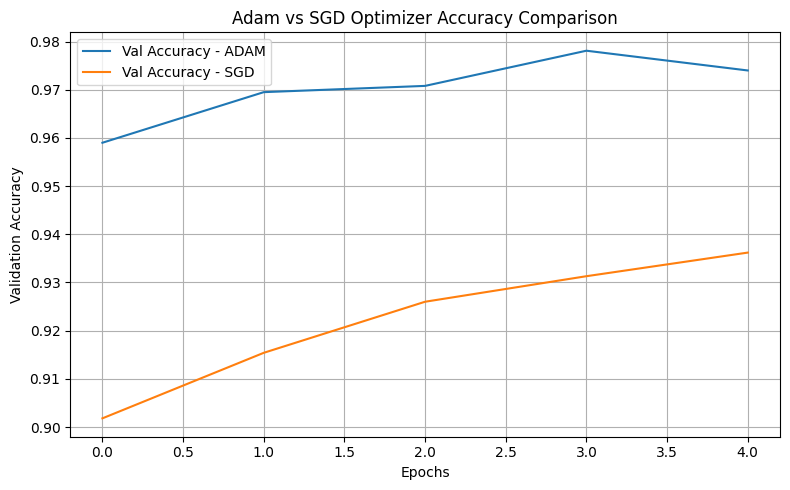

In [ ]:
# Plot validation accuracy for both optimizers
plt.figure(figsize=(8, 5))
for opt, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'Val Accuracy - {opt.upper()}')

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Adam vs SGD Optimizer Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig("optimizer_comparison.png")  # Save chart for submission
plt.show()